# Pandas Series

![pandas](images/pandas.png "Pandas Logo")


- Started by Wes MacKinney with a first release in 2011.
- Based on NumPy, it is the most used library for all things data.
- Motivated by the toolbox in R for manipulating data easily.
- A lot of names in Pandas come from R world.
- It is Open source (BSD)

https://pandas.pydata.org/

```python
import pandas as pd
```

"*Pandas provides high-performance, easy-to-use data structures 
and data analysis tools in Python*"

- Self-describing data structures
- Data loaders to/from common file formats
- Plotting functions
- Basic statistical tools.

In [260]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option("display.max_rows", 8)
plt.rcParams['figure.figsize'] = (9, 6)

## [Series](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series)

- A Series contains a one-dimensional array of data, *and* an associated sequence of labels called the *index*.
- The index can contain numeric, string, or date/time values.
- When the index is a time value, the series is a [time series](https://en.wikipedia.org/wiki/Time_series).
- The index must be the same length as the data.
- If no index is supplied it is automatically generated as `range(len(data))`.

In [261]:
pd.Series([1,3,5,np.nan,6,8], dtype=np.float64)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [262]:
pd.Series(index=pd.period_range('09/11/2017', '09/18/2017', freq="D"), dtype=np.int8)

2017-09-11   NaN
2017-09-12   NaN
2017-09-13   NaN
2017-09-14   NaN
2017-09-15   NaN
2017-09-16   NaN
2017-09-17   NaN
2017-09-18   NaN
Freq: D, dtype: float64

### Exercise
- Create a text with `lorem` and count word occurences with a `collection.Counter`. Put the result in a `dict`.

In [263]:
import re
from collections import Counter

def map_words(filename):
    data = []
    with open(filename, "r") as file:
        data = file.read()
    text = re.sub('[^a-z\ \']+', " ", data)
    words = list(text.split())
    return words

l = map_words('sample.txt')
result = Counter(l)
print(result)

Counter({'modi': 18, 'tempora': 18, 'dolore': 18, 'neque': 17, 'quisquam': 17, 'numquam': 17, 'etincidunt': 17, 'dolor': 16, 'eius': 16, 'sit': 16, 'quaerat': 16, 'ut': 16, 'labore': 16, 'ipsum': 15, 'velit': 15, 'est': 15, 'consectetur': 15, 'magnam': 15, 'sed': 13, 'aliquam': 13, 'quiquia': 13, 'porro': 13, 'amet': 12, 'non': 12, 'dolorem': 12, 'adipisci': 11, 'voluptatem': 9, 'ius': 6, 'uisquam': 5, 'ed': 5, 'uiquia': 4, 'st': 4, 'it': 4, 'abore': 4, 'orro': 4, 'umquam': 4, 'olore': 4, 'eque': 3, 'oluptatem': 3, 'dipisci': 3, 'elit': 3, 'onsectetur': 3, 'on': 3, 't': 2, 'agnam': 2, 'uaerat': 2, 'odi': 2, 'psum': 2, 'liquam': 2, 'olor': 1, 'tincidunt': 1})


### Exercise
- From the results create a Pandas series name latin_series with words in alphabetical order as index.

In [264]:
df = pd.Series(result)
df

uiquia        4
ipsum        15
modi         18
dolor        16
             ..
on            3
psum          2
tincidunt     1
liquam        2
Length: 51, dtype: int64

### Exercise

- Plot the series using 'bar' kind.

<AxesSubplot:>

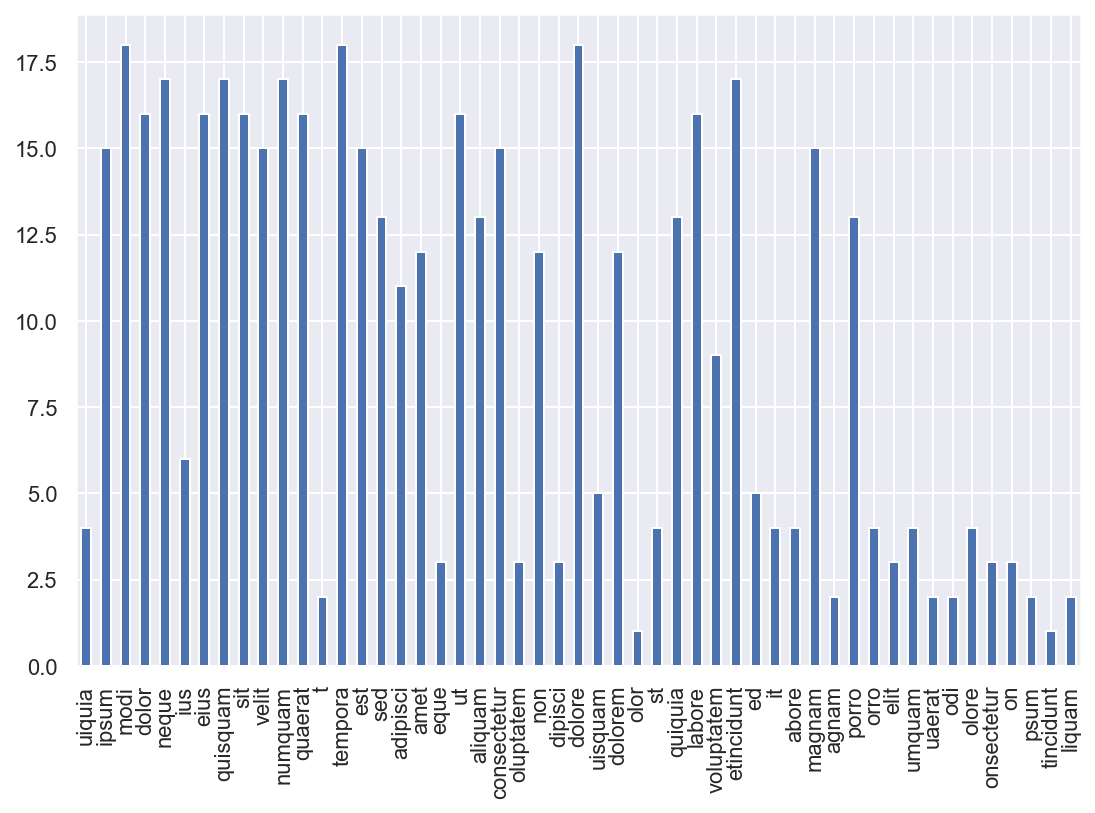

In [265]:
df.plot.bar()

### Exercise
- Pandas provides explicit functions for indexing `loc` and `iloc`.
    - Use `loc` to display the number of occurrences of 'dolore'.
    - Use `iloc` to diplay the number of occurrences of the last word in index.

In [266]:
df.loc['dolore']

18

In [267]:
df.iloc[-1]

2

In [268]:
type(df)

pandas.core.series.Series

### Exercise
- Sort words by number of occurrences.
- Plot the Series.

In [269]:
df = df.sort_values(ascending=True)
df

tincidunt     1
olor          1
liquam        2
psum          2
             ..
neque        17
tempora      18
modi         18
dolore       18
Length: 51, dtype: int64

<AxesSubplot:>

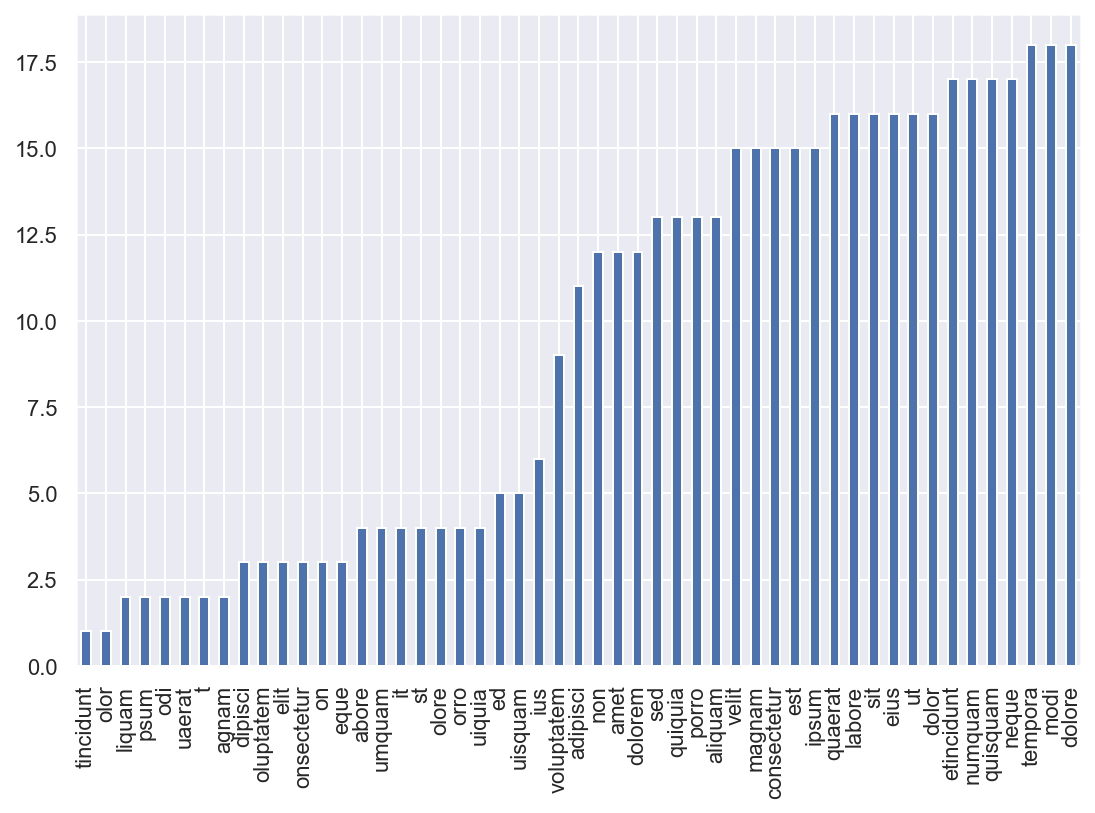

In [270]:
df.plot.bar()

### Full globe temperature between 1901 and 2000.

We read the text file and load the results in a pandas dataframe. 
In cells below you need to clean the data and convert the dataframe to a time series.

In [196]:
import os
here = os.getcwd()

filename = os.path.join(here,"data","monthly.land.90S.90N.df_1901-2000mean.dat.txt")

df = pd.read_table(filename, sep="\s+", 
                   names=["year", "month", "mean temp"])
df

,year,month,mean temp
0,1880,1,-0.0235
1,1880,2,-0.4936
2,1880,3,-0.6785
3,1880,4,-0.2829
...,...,...,...
1580,2011,9,-999.0000
1581,2011,10,-999.0000
1582,2011,11,-999.0000
1583,2011,12,-999.0000


### Exercise
- Insert a third column with value one named "day" with `.insert`.
- convert df index to datetime with `pd.to_datetime` function.
- convert df to Series containing only "mean temp" column.

In [197]:
from numpy import random
df.insert(2, "day", random.randint(1, 29, size=(1584)))
df

,year,month,day,mean temp
0,1880,1,26,-0.0235
1,1880,2,10,-0.4936
2,1880,3,12,-0.6785
3,1880,4,7,-0.2829
...,...,...,...,...
1580,2011,9,10,-999.0000
1581,2011,10,11,-999.0000
1582,2011,11,18,-999.0000
1583,2011,12,7,-999.0000


In [198]:
cols = ['year', 'month', 'day']
df['datetime'] = pd.to_datetime(df[cols])

In [199]:
rs = pd.Series(df['mean temp'])
rs

0        -0.0235
1        -0.4936
2        -0.6785
3        -0.2829
          ...   
1580   -999.0000
1581   -999.0000
1582   -999.0000
1583   -999.0000
Name: mean temp, Length: 1584, dtype: float64

### Exercise 
- Display the beginning of the file with `.head`.

In [258]:
rs.head()

0   -0.0235
1   -0.4936
2   -0.6785
3   -0.2829
4   -0.1261
Name: mean temp, dtype: float64

### Exercise 
- Display the end of the file with `.tail`.

In [259]:
rs.tail()

1573    0.5113
1574    0.8618
1575    1.0897
1576    0.7247
1577    0.8550
Name: mean temp, dtype: float64

In the dataset, -999.00 was used to indicate that there was no value for that year.

### Exercise

- Display values equal to -999 with `.values`. 
- Replace the missing value (-999.000) by `np.nan`

In [203]:
rs.values[rs.values == -999]

array([-999., -999., -999., -999., -999., -999.])

In [204]:
import numpy
rs = rs.replace(-999.0000, numpy.nan)
rs

0      -0.0235
1      -0.4936
2      -0.6785
3      -0.2829
         ...  
1580       NaN
1581       NaN
1582       NaN
1583       NaN
Name: mean temp, Length: 1584, dtype: float64

Once they have been converted to np.nan, missing values can be removed (dropped).

### Exercise 
- Remove missing values with `.dropna`.

In [205]:
rs = rs.dropna()
rs

0      -0.0235
1      -0.4936
2      -0.6785
3      -0.2829
         ...  
1574    0.8618
1575    1.0897
1576    0.7247
1577    0.8550
Name: mean temp, Length: 1578, dtype: float64

### Exercise
- Generate a basic visualization using `.plot`.

<AxesSubplot:>

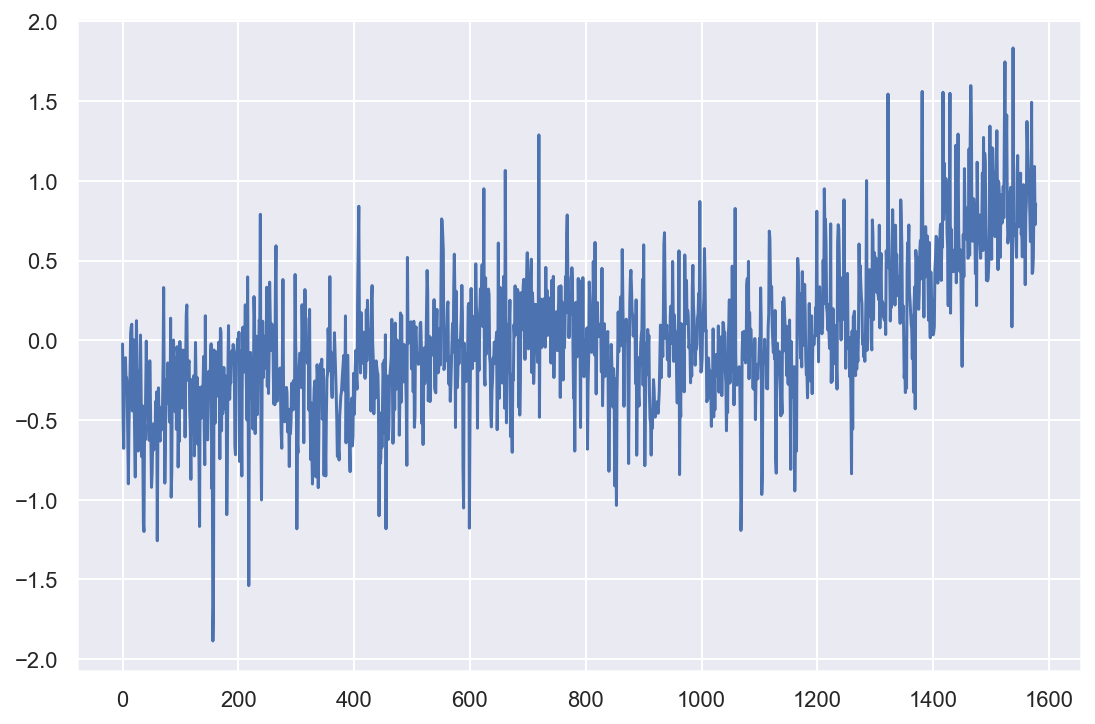

In [206]:
rs.plot()

### Exercise

Convert df index from timestamp to period is more meaningfull since it was measured and averaged over the month. Use `to_period` method.

In [221]:
pd.DataFrame(index=df['datetime']).index.to_period('M')

PeriodIndex(['1880-01', '1880-02', '1880-03', '1880-04', '1880-05', '1880-06',
             '1880-07', '1880-08', '1880-09', '1880-10',
             ...
             '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08',
             '2011-09', '2011-10', '2011-11', '2011-12'],
            dtype='period[M]', name='datetime', length=1584)

## Resampling

Series can be resample, downsample or upsample.
- Frequencies can be specified as strings: "us", "ms", "S", "T", "H", "D", "B", "W", "M", "A", "3min", "2h20", ...
- More aliases at http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

### Exercise

- With `resample` method, convert df Series to 10 year blocks:

In [241]:
df = df.resample('10Y', on='datetime').mean()

In [249]:
cols = ['year', 'month', 'day']
df = df.drop(cols, axis=1)

In [253]:
df

,mean temp
datetime,
1880-12-31,-0.381800
1890-12-31,-0.389158
1900-12-31,-0.287662
1910-12-31,-0.270017
...,...
1990-12-31,0.227565
2000-12-31,0.460519
2010-12-31,0.829147
2020-12-31,-499.127283


<AxesSubplot:xlabel='datetime'>

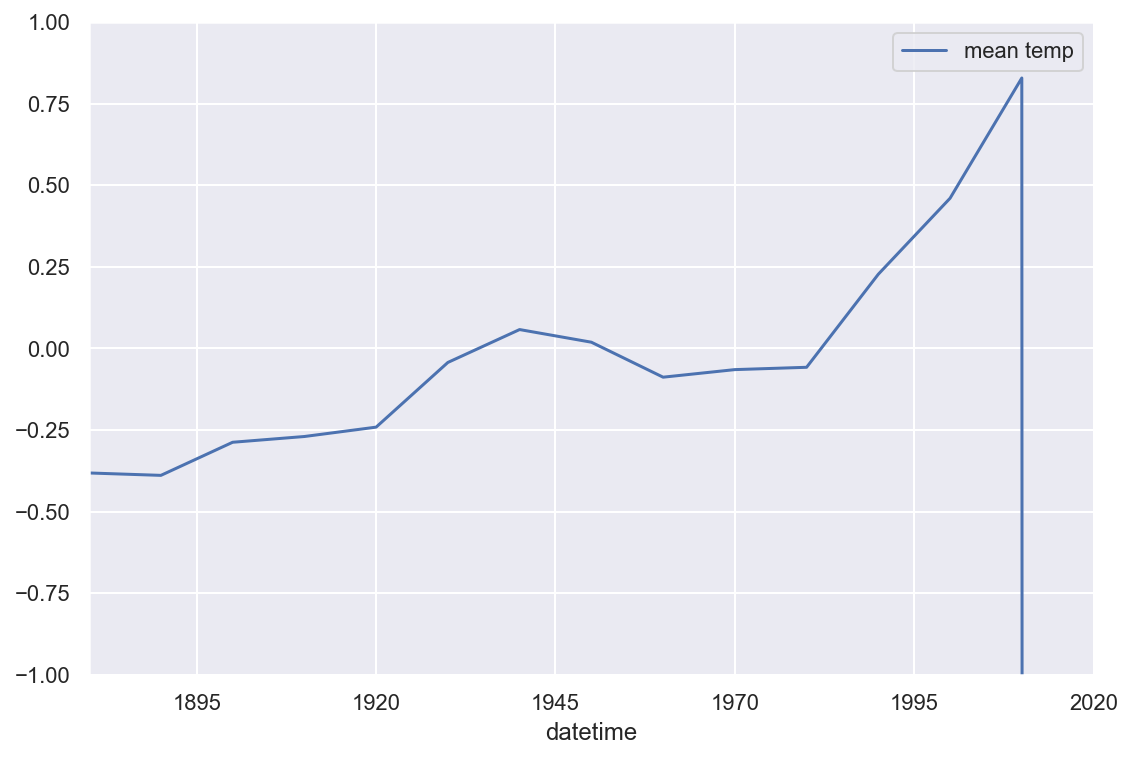

In [257]:
df.plot(ylim=(-1,1))

### Saving Work

[HDF5](https://support.hdfgroup.org/HDF5/) is widely used and one of the most powerful file format to store binary data. It allows to store both Series and DataFrames.

In [223]:
with pd.HDFStore("data/pandas_series.h5") as writer:
    df.to_hdf(writer, "/temperatures/full_globe")

### Reloading data

In [224]:
with pd.HDFStore("data/pandas_series.h5") as store:
    df = store["/temperatures/full_globe"]

In [226]:
df

,year,month,day,mean temp,datetime
0,1880,1,26,-0.0235,1880-01-26
1,1880,2,10,-0.4936,1880-02-10
2,1880,3,12,-0.6785,1880-03-12
3,1880,4,7,-0.2829,1880-04-07
...,...,...,...,...,...
1580,2011,9,10,-999.0000,2011-09-10
1581,2011,10,11,-999.0000,2011-10-11
1582,2011,11,18,-999.0000,2011-11-18
1583,2011,12,7,-999.0000,2011-12-07
